In [1]:
from sectors.utils.visualize import (
    get_results,
    plot_results,
    plot_wordcloud,
    plot_data_insights,
    plot_roc_pr_curves
)
import pandas as pd

# Data Analysis

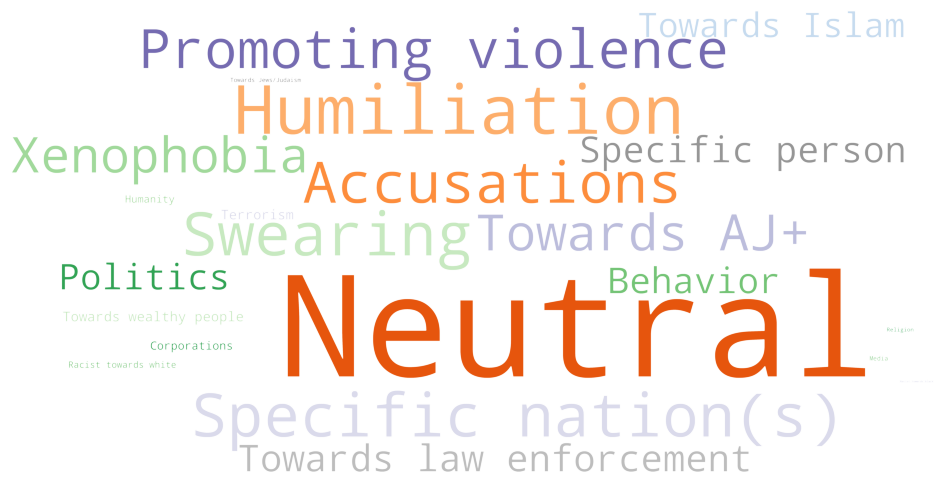

In [2]:
plot_wordcloud("hatespeech")

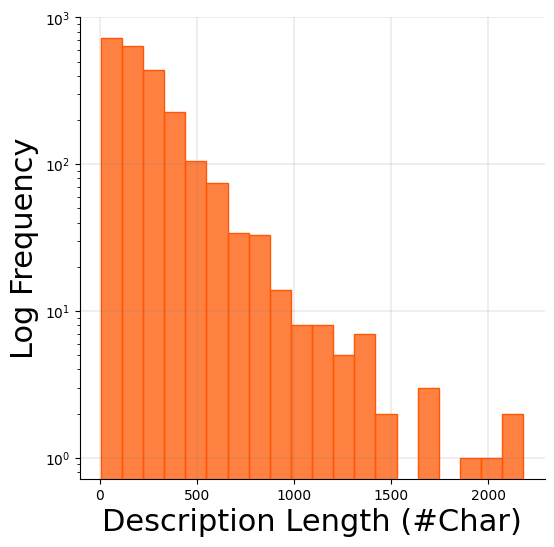

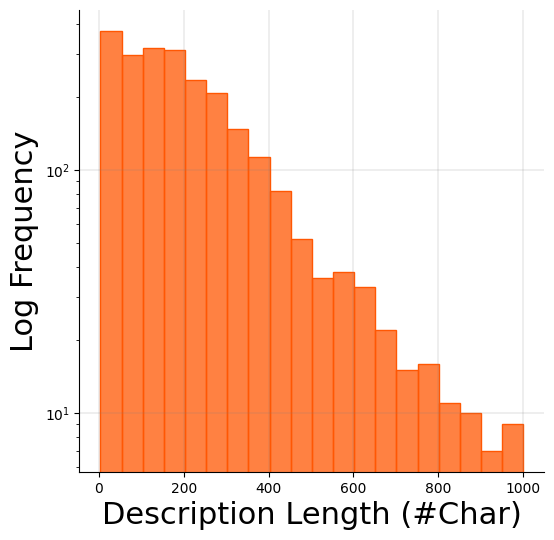

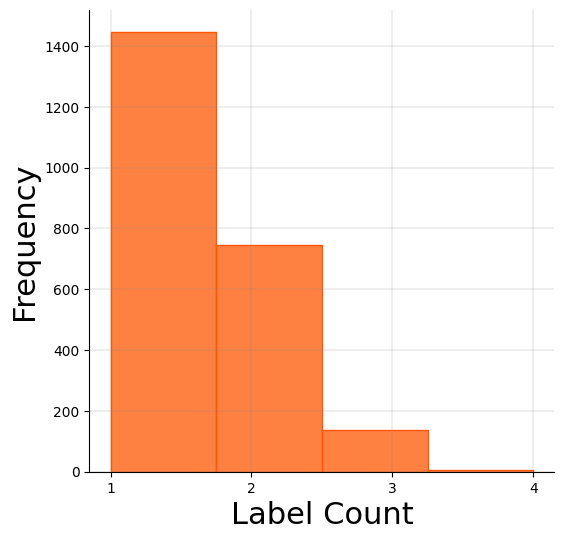

In [3]:
plot_data_insights("hatespeech")

# Extract & Plot Results

In [2]:
res = get_results("hatespeech")

res

,model,method,augmented,trie_search,training_flops,inference_flops,macro_f1,macro_f1_std,macro_f1_se
0,LLaMa 7B,PTEC,augmented,unconstrained,3.231304e+17,3.904870e+18,0.383127,0.009046,0.005223
1,Bloom 1B7,PTEC,augmented,unconstrained,1.841313e+17,5.948005e+18,0.357490,0.020702,0.011952
17,Bloom 1B7,PTEC,preprocessed,unconstrained,6.992082e+16,3.964038e+17,0.479644,0.014742,0.008511
16,LLaMa 7B,PTEC,preprocessed,unconstrained,1.306439e+17,2.266661e+18,0.436917,0.006532,0.003771
27,LLaMa 7B,PT + TS,preprocessed,trie_search,2.222736e+17,2.372016e+18,0.470365,0.032476,0.018750
11,Bloom 1B7,PT + TS,augmented,trie_search,2.647259e+17,8.814194e+18,0.324835,0.031814,0.018368
10,LLaMa 7B,PT + TS,augmented,trie_search,2.092706e+17,4.271547e+18,0.415041,0.050452,0.029128
28,Bloom 1B7,PT + TS,preprocessed,trie_search,8.692212e+16,6.852648e+17,0.233481,0.123183,0.071120
8,LLaMa 7B,PT,augmented,unconstrained,2.092706e+17,4.304109e+18,0.453498,0.045209,0.026102
9,Bloom 1B7,PT,augmented,unconstrained,2.647259e+17,8.782162e+18,0.311036,0.013130,0.007581


In [28]:
res = res.sort_values(by=['model', 'method'])
res[['macro_f1', 'macro_f1_std']] = res[['macro_f1', 'macro_f1_std']].round(3).astype(str)
# only use rows where augmentes == preprocessed
res = res[res['augmented'] == 'preprocessed']
# if  trie_search == True, add '+ TS' to method
#res['method'] = res['method'].str.cat(res['trie_search'].replace({"trie_search": '+ TS', "unconstrained": ''}))
res = res.drop(columns=['macro_f1_se', 'augmented', 'trie_search'])
table = res.to_latex(index=False, float_format="%.2e", header=True, 
                          multicolumn=True, multicolumn_format='c', 
                          column_format='ccccccc', 
                          longtable=False)

print(table)

\begin{tabular}{ccccccc}
\toprule
model & method & training_flops & inference_flops & macro_f1 & macro_f1_std \\
\midrule
Bloom 1B7 & PTEC & 6.99e+16 & 3.96e+17 & 0.48 & 0.015 \\
Bloom 1B7 & PT + TS & 8.69e+16 & 6.85e+17 & 0.233 & 0.123 \\
Bloom 1B7 & PT & 8.69e+16 & 7.94e+17 & 0.318 & 0.088 \\
Bloom 1B7 & CH & 6.82e+12 & 3.59e+17 & 0.063 & 0.011 \\
Bloom 1B7 & KNN & 8.39e+14 & 3.59e+17 & 0.12 & 0.0 \\
Bloom 1B7 & RadiusNN & 8.39e+14 & 3.59e+17 & 0.0 & 0.0 \\
Bloom 1B7 & N-shot + TS & 0.00e+00 & 2.81e+18 & 0.082 & 0.002 \\
Bloom 1B7 & N-shot & 0.00e+00 & 2.51e+18 & 0.055 & 0.005 \\
LLaMa 7B & PTEC & 1.31e+17 & 2.27e+18 & 0.437 & 0.007 \\
LLaMa 7B & PT + TS & 2.22e+17 & 2.37e+18 & 0.47 & 0.032 \\
LLaMa 7B & PT & 2.22e+17 & 3.20e+18 & 0.526 & 0.021 \\
LLaMa 7B & CH & 3.07e+13 & 1.59e+18 & 0.365 & 0.014 \\
LLaMa 7B & KNN & 3.72e+15 & 1.59e+18 & 0.195 & 0.0 \\
LLaMa 7B & RadiusNN & 3.72e+15 & 1.59e+18 & 0.142 & 0.0 \\
LLaMa 7B & N-shot + TS & 0.00e+00 & 4.40e+18 & 0.094 & 0.008 \\
LLaMa 7B

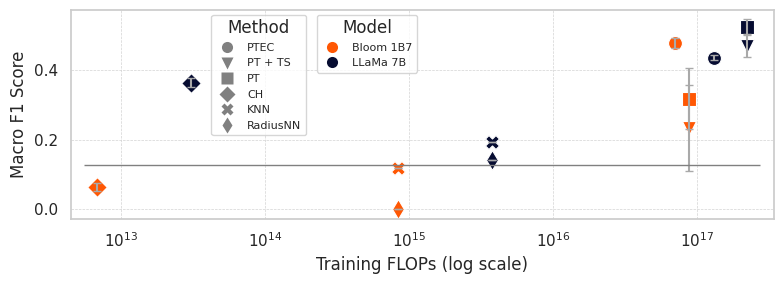

In [3]:
plot_results(res, 'Training', 'std', (0.2, 0.4), (0.35, 0.7))

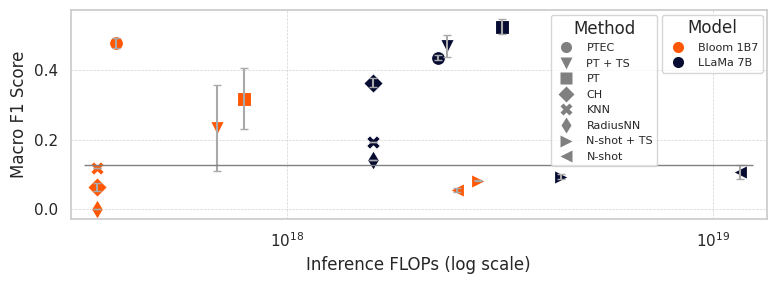

In [8]:
plot_results(res, 'Inference', "std", (0.69, 0.25), (0.85, 0.7))

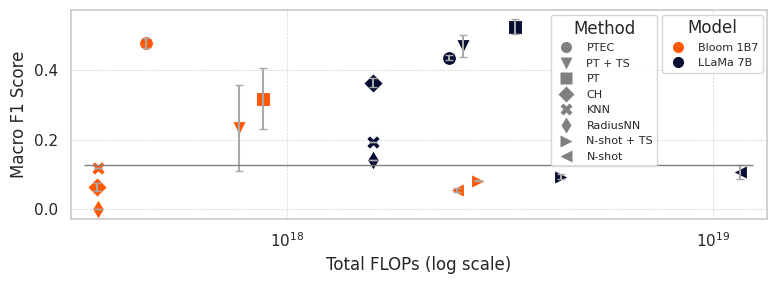

In [10]:
plot_results(res, 'Total', 'std', (0.69, 0.25), (0.85, 0.7))

# data augmentation effects

In [5]:
df = res.loc[res.model == "LLaMa 7B"].round(3)

# drop unnecessary columns
df = df.drop(columns=['model'])

# pivot the DataFrame
df_pivot = df.pivot_table(index='augmented', columns='method', values='macro_f1')

# rename the columns
df_pivot.columns = pd.MultiIndex.from_product([['Macro F1'], df_pivot.columns])

# convert the index into a column and replace Boolean values with appropriate labels
df_pivot.reset_index(level=0, inplace=True)
df_pivot['augmented'] = df_pivot['augmented'].map({True: 'Augmented', False: 'Non-Augmented'})

latex_table = df_pivot.to_latex(index=False, escape=False, multirow=True, float_format="%.3f")

# print the latex_table
print(latex_table)


\begin{tabular}{lrrrrrrrr}
\toprule
augmented & \multicolumn{8}{r}{Macro F1} \\
 & PTEC & PT + TS & PT & CH & KNN & RadiusNN & N-shot + TS & N-shot \\
\midrule
NaN & 0.383 & 0.415 & 0.453 & 0.327 & 0.227 & 0.164 & NaN & NaN \\
NaN & 0.437 & 0.470 & 0.526 & 0.365 & 0.195 & 0.142 & 0.094 & 0.107 \\
\bottomrule
\end{tabular}



# ROC Curve

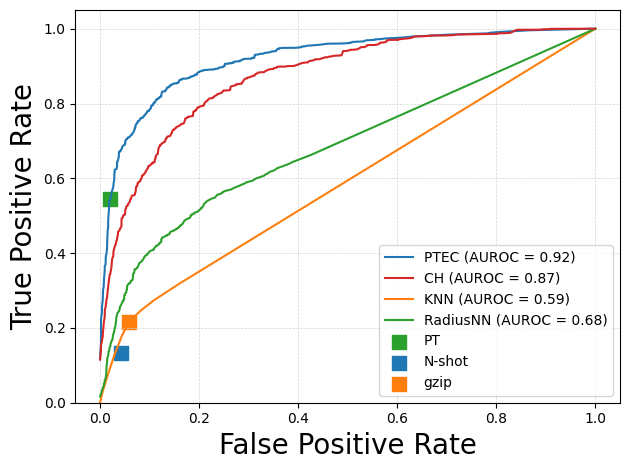

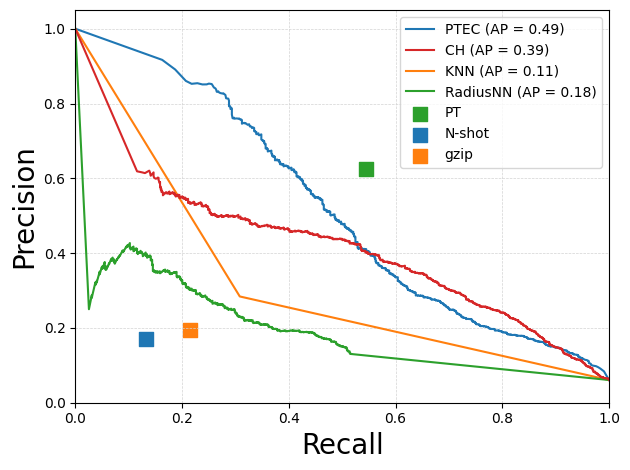

In [2]:
plot_roc_pr_curves("hatespeech", "llama-7b")